# Bachelor's
## Creation and training 3D CNN with RGB-dataset and Skeleton-dataset

In [ ]:
import os
import numpy as np
from google.colab import drive
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import tensorflow as tf
from keras.optimizers import Adam
import random
from keras.layers import Input, Conv3D, MaxPooling3D, BatchNormalization, Activation, Flatten, Dense, Dropout, LSTM, GlobalAveragePooling3D
from keras.models import Model
from keras.regularizers import l2

In [ ]:
def shuffle_data(frames, classes):
  combined_data = list(zip(frames, classes))
  random.shuffle(combined_data)
  shuffled_frames, shuffled_classes = zip(*combined_data)
  return np.array(shuffled_frames), np.array(shuffled_classes)

### 3D CNN

In [ ]:
def CNN3D(input_shape, num_classes, power):
    # Вхідний шар
    inputs = Input(shape=input_shape)
    x = inputs

    for i in range(power):
      x = Conv3D(filters=32 * 2**i, kernel_size=(3, 3, 3), padding='same', activation='relu')(x)
      x = BatchNormalization()(x)
      x = MaxPooling3D(pool_size=(2, 2, 2))(x)

    # # Перший конволюційний блок
    # x = Conv3D(filters=32, kernel_size=(3, 3, 3), padding='same', activation='relu')(inputs)
    # x = BatchNormalization()(x)
    # x = MaxPooling3D(pool_size=(2, 2, 2))(x)

    # # Другий конволюційний блок
    # x = Conv3D(filters=64, kernel_size=(3, 3, 3), padding='same', activation='relu')(x)
    # x = BatchNormalization()(x)
    # x = MaxPooling3D(pool_size=(2, 2, 2))(x)

    # # Третій конволюційний блок
    # x = Conv3D(filters=128, kernel_size=(3, 3, 3), padding='same', activation='relu')(x)
    # x = BatchNormalization()(x)
    # x = MaxPooling3D(pool_size=(2, 2, 2))(x)

    # # Четвертий конволюційний блок
    # x = Conv3D(filters=256, kernel_size=(3, 3, 3), padding='same', activation='relu')(x)
    # x = BatchNormalization()(x)
    # x = MaxPooling3D(pool_size=(2, 2, 2))(x)

    # # Пятий конволюційний блок
    # x = Conv3D(filters=512, kernel_size=(3, 3, 3), padding='same', activation='relu')(x)
    # x = BatchNormalization()(x)
    # x = MaxPooling3D(pool_size=(2, 2, 2))(x)

    # Згортковий шар
    x = Flatten()(x)

    # Повнозв'язаний шар
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
    # x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Вихідний шар
    outputs = Dense(num_classes, activation='softmax')(x)

    # Модель
    model = Model(inputs=inputs, outputs=outputs)

    return model

num_classes = 7

skeleton16_cnn3d = CNN3D((16, 162, 288, 3), num_classes, 4)
skeleton16_cnn3d.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16, 162, 288, 3   0         
                             )]                                  
                                                                 
 conv3d (Conv3D)             (None, 16, 162, 288, 32   2624      
                             )                                   
                                                                 
 batch_normalization (Batch  (None, 16, 162, 288, 32   128       
 Normalization)              )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 8, 81, 144, 32)    0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 8, 81, 144, 64)    55360 

### Load dataset

In [ ]:
drive.mount('/content/drive')

rgb8_train_frames = np.load('/content/drive/My Drive/skeleton16_train_frames.npy')
rgb8_train_classes = np.load('/content/drive/My Drive/skeleton16_train_classes.npy')

rgb8_test_frames = np.load('/content/drive/My Drive/skeleton16_test_frames.npy')
rgb8_test_classes = np.load('/content/drive/My Drive/skeleton16_test_classes.npy')

rgb8_val_frames = np.load('/content/drive/My Drive/skeleton16_val_frames.npy')
rgb8_val_classes = np.load('/content/drive/My Drive/skeleton16_val_classes.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


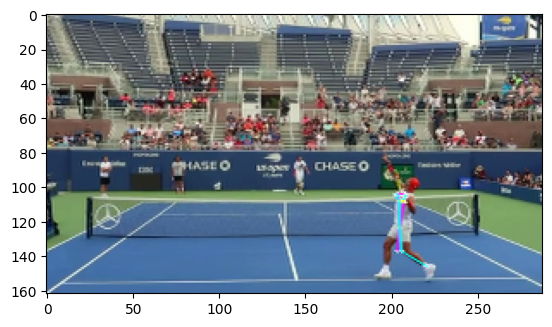

In [ ]:
plt.imshow(rgb8_train_frames[183][3])

In [ ]:
rgb8_train_frames, rgb8_train_classes = shuffle_data(rgb8_train_frames, rgb8_train_classes)
rgb8_test_frames, rgb8_test_classes = shuffle_data(rgb8_test_frames, rgb8_test_classes)
rgb8_val_frames, rgb8_val_classes = shuffle_data(rgb8_val_frames, rgb8_val_classes)

In [ ]:
print(rgb8_train_frames.shape, rgb8_test_frames.shape, rgb8_val_frames.shape)
print(rgb8_train_classes.shape, rgb8_test_classes.shape, rgb8_val_classes.shape)

(210, 16, 162, 288, 3) (70, 16, 162, 288, 3) (91, 16, 162, 288, 3)
(210,) (70,) (91,)


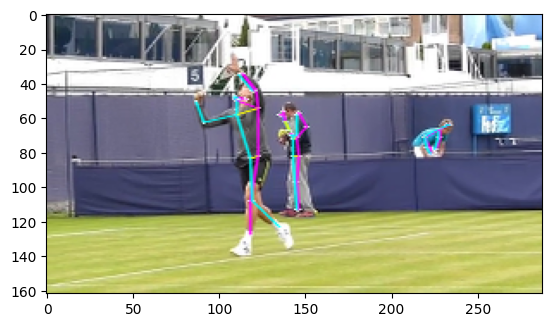

In [ ]:
plt.imshow(rgb8_train_frames[145][5])

In [ ]:
rgb8_val_classes[:20]

array([2, 5, 1, 3, 2, 5, 0, 4, 4, 0, 6, 6, 1, 1, 2, 6, 3, 2, 3, 0],
      dtype=int32)

In [ ]:
from keras.utils import to_categorical

# Перетворення міток класів в one-hot encoding
rgb8_train_classes = to_categorical(rgb8_train_classes)
rgb8_test_classes = to_categorical(rgb8_test_classes)
rgb8_val_classes = to_categorical(rgb8_val_classes)

In [ ]:
rgb8_train_classes[145]

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
from keras.optimizers import Adam

skeleton16_cnn3d.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
history = skeleton16_cnn3d.fit(rgb8_train_frames, rgb8_train_classes, epochs=100, batch_size=8, validation_data=(rgb8_val_frames, rgb8_val_classes))

Epoch 1/100
27/27 [==============================] - 29s 618ms/step - loss: 818.6699 - accuracy: 0.2810 - val_loss: 60217.4453 - val_accuracy: 0.1429
Epoch 2/100
27/27 [==============================] - 12s 434ms/step - loss: 1021.5822 - accuracy: 0.3095 - val_loss: 4195.9595 - val_accuracy: 0.1648
Epoch 3/100
27/27 [==============================] - 11s 411ms/step - loss: 781.9470 - accuracy: 0.4333 - val_loss: 1529.1118 - val_accuracy: 0.1538
Epoch 4/100
27/27 [==============================] - 11s 396ms/step - loss: 566.0469 - accuracy: 0.5524 - val_loss: 615.4633 - val_accuracy: 0.3077
Epoch 5/100
27/27 [==============================] - 11s 408ms/step - loss: 391.1817 - accuracy: 0.5381 - val_loss: 490.7068 - val_accuracy: 0.2527
Epoch 6/100
27/27 [==============================] - 12s 436ms/step - loss: 267.4137 - accuracy: 0.5714 - val_loss: 319.2364 - val_accuracy: 0.2857
Epoch 7/100
27/27 [==============================] - 12s 441ms/step - loss: 171.5525 - accuracy: 0.6143 - v

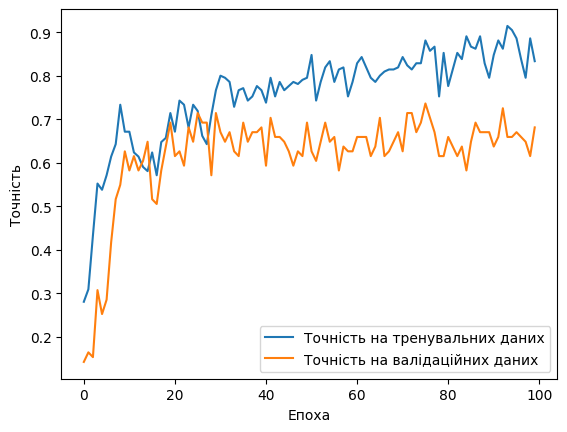

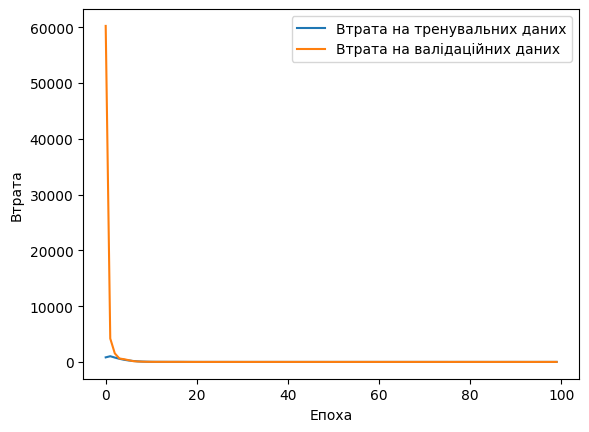

In [ ]:
import matplotlib.pyplot as plt

# Відображення графіка точності
plt.plot(history.history['accuracy'], label='Точність на тренувальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.show()

# Відображення графіка втрати
plt.plot(history.history['loss'], label='Втрата на тренувальних даних')
plt.plot(history.history['val_loss'], label='Втрата на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Зробити передбачення на тренувальних і тестових даних
rgb8_train_predictions = np.argmax(skeleton16_cnn3d.predict(rgb8_train_frames, batch_size=8), axis=1)
rgb8_test_predictions = np.argmax(skeleton16_cnn3d.predict(rgb8_test_frames, batch_size=8), axis=1)
rgb8_val_predictions = np.argmax(skeleton16_cnn3d.predict(rgb8_val_frames, batch_size=8), axis=1)

# Отримати істинні мітки класів
rgb8_train_true_labels = np.argmax(rgb8_train_classes, axis=1)
rgb8_test_true_labels = np.argmax(rgb8_test_classes, axis=1)
rgb8_val_true_labels = np.argmax(rgb8_val_classes, axis=1)

# Побудувати матрицю плутанини для тренувальних і тестових даних
rgb8_train_confusion_matrix = confusion_matrix(rgb8_train_true_labels, rgb8_train_predictions)
rgb8_test_confusion_matrix = confusion_matrix(rgb8_test_true_labels, rgb8_test_predictions)
rgb8_val_confusion_matrix = confusion_matrix(rgb8_val_true_labels, rgb8_val_predictions)

12/12 [==============================] - 2s 129ms/step


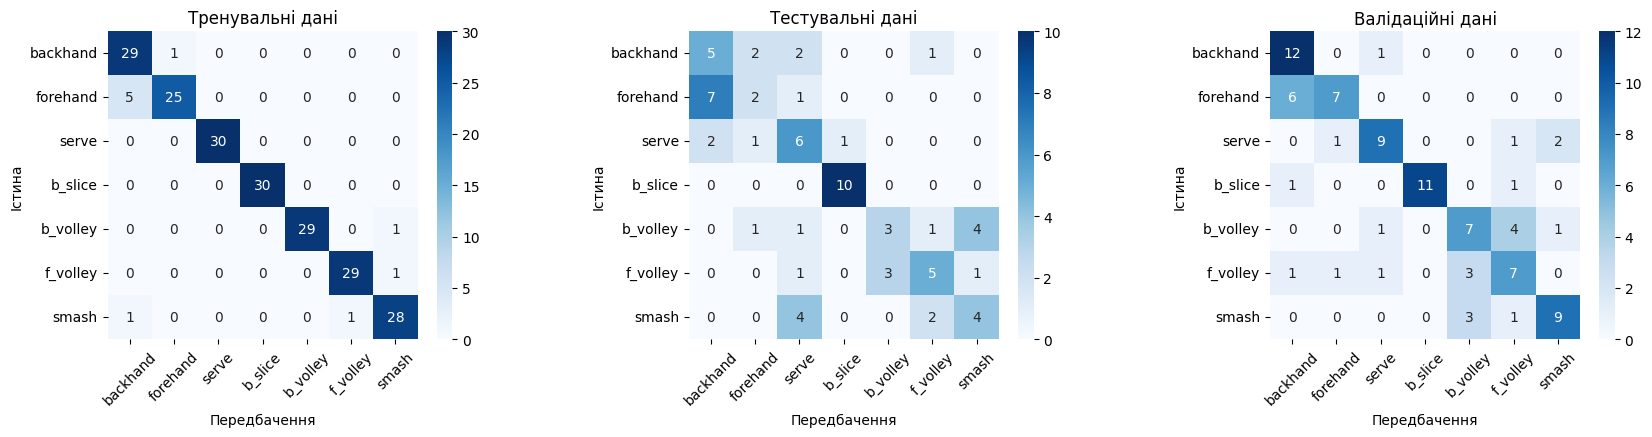

In [ ]:
class_labels = ['backhand', 'forehand', 'serve', 'b_slice', 'b_volley', 'f_volley', 'smash']

plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
sns.heatmap(rgb8_train_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Тренувальні дані')
plt.xlabel('Передбачення')
plt.ylabel('Істина')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=45)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)

plt.subplot(1, 3, 2)
sns.heatmap(rgb8_test_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Тестувальні дані')
plt.xlabel('Передбачення')
plt.ylabel('Істина')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=45)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)

plt.subplot(1, 3, 3)
sns.heatmap(rgb8_val_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Валідаційні дані')
plt.xlabel('Передбачення')
plt.ylabel('Істина')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=45)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)
plt.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Обчислення точності для тренувальних та тестових даних
rgb8_train_accuracy = accuracy_score(rgb8_train_true_labels, rgb8_train_predictions)
rgb8_test_accuracy = accuracy_score(rgb8_test_true_labels, rgb8_test_predictions)
rgb8_val_accuracy = accuracy_score(rgb8_val_true_labels, rgb8_val_predictions)

print("Train Accuracy:", rgb8_train_accuracy)
print("Test Accuracy:", rgb8_test_accuracy)
print("Val Accuracy:", rgb8_val_accuracy)

Train Accuracy: 0.9523809523809523
Test Accuracy: 0.5
Val Accuracy: 0.6813186813186813


In [ ]:
from sklearn.metrics import precision_score

class_names = {'backhand': 0, 'forehand': 1, 'serve': 2, 'b_slice': 3, 'b_volley': 4, 'f_volley': 5, 'smash': 6}

# Обчислити точність для тренувальних, валідаційних і тестових даних для кожного класу
rgb8_train_precision = precision_score(rgb8_train_true_labels, rgb8_train_predictions, average=None)
rgb8_val_precision = precision_score(rgb8_val_true_labels, rgb8_val_predictions, average=None)
rgb8_test_precision = precision_score(rgb8_test_true_labels, rgb8_test_predictions, average=None)

print("Точність рухів тренувальних даних:")
for class_name, precision in zip(class_names.keys(), rgb8_train_precision):
    print("{:8}: {:.4f}".format(class_name, precision))

print("\nТочність рухів валідаційних даних:")
for class_name, precision in zip(class_names.keys(), rgb8_val_precision):
    print("{:8}: {:.4f}".format(class_name, precision))

print("\nТочність рухів тестових даних:")
for class_name, precision in zip(class_names.keys(), rgb8_test_precision):
    print("{:8}: {:.4f}".format(class_name, precision))

Точність рухів тренувальних даних:
backhand: 0.8286
forehand: 0.9615
serve   : 1.0000
b_slice : 1.0000
b_volley: 1.0000
f_volley: 0.9667
smash   : 0.9333

Точність рухів валідаційних даних:
backhand: 0.6000
forehand: 0.7778
serve   : 0.7500
b_slice : 1.0000
b_volley: 0.5385
f_volley: 0.5000
smash   : 0.7500

Точність рухів тестових даних:
backhand: 0.3571
forehand: 0.3333
serve   : 0.4000
b_slice : 0.9091
b_volley: 0.5000
f_volley: 0.5556
smash   : 0.4444


In [ ]:
 skeleton16_cnn3d.save('skeleton16_cnn3d.h5')

In [ ]:
from keras.models import load_model

rgb32 = load_model('/content/drive/My Drive/rgb32_resnet3d.h5')

rgb32_train_frames = np.load('/content/drive/My Drive/rgb32_train_frames.npy')
rgb32_train_classes = np.load('/content/drive/My Drive/rgb32_train_classes.npy')

rgb32_test_frames = np.load('/content/drive/My Drive/rgb32_test_frames.npy')
rgb32_test_classes = np.load('/content/drive/My Drive/rgb32_test_classes.npy')

rgb32_val_frames = np.load('/content/drive/My Drive/rgb32_val_frames.npy')
rgb32_val_classes = np.load('/content/drive/My Drive/rgb32_val_classes.npy')

In [ ]:
rgb32_train_frames, rgb32_train_classes = shuffle_data(rgb32_train_frames, rgb32_train_classes)
rgb32_test_frames, rgb32_test_classes = shuffle_data(rgb32_test_frames, rgb32_test_classes)
rgb32_val_frames, rgb32_val_classes = shuffle_data(rgb32_val_frames, rgb32_val_classes)

In [ ]:
from keras.utils import to_categorical

# Перетворення міток класів в one-hot encoding
rgb32_train_classes = to_categorical(rgb32_train_classes)
rgb32_test_classes = to_categorical(rgb32_test_classes)
rgb32_val_classes = to_categorical(rgb32_val_classes)

In [ ]:
rgb32.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
history = rgb32.fit(rgb32_train_frames, rgb32_train_classes, epochs=50, batch_size=8, validation_data=(rgb32_val_frames, rgb32_val_classes))

Epoch 1/50
27/27 [==============================] - 54s 996ms/step - loss: 2.8074 - accuracy: 0.4286 - val_loss: 13.4340 - val_accuracy: 0.2418
Epoch 2/50
27/27 [==============================] - 16s 581ms/step - loss: 3.6752 - accuracy: 0.3952 - val_loss: 17.3561 - val_accuracy: 0.2198
Epoch 3/50
27/27 [==============================] - 16s 581ms/step - loss: 3.0118 - accuracy: 0.5190 - val_loss: 12.1169 - val_accuracy: 0.1758
Epoch 4/50
27/27 [==============================] - 15s 565ms/step - loss: 2.9584 - accuracy: 0.4857 - val_loss: 4.0372 - val_accuracy: 0.2967
Epoch 5/50
27/27 [==============================] - 15s 566ms/step - loss: 2.8584 - accuracy: 0.4714 - val_loss: 5.4810 - val_accuracy: 0.2747
Epoch 6/50
27/27 [==============================] - 16s 580ms/step - loss: 2.6732 - accuracy: 0.4905 - val_loss: 3.8165 - val_accuracy: 0.3297
Epoch 7/50
27/27 [==============================] - 16s 592ms/step - loss: 2.2940 - accuracy: 0.5905 - val_loss: 3.9447 - val_accuracy: 0.3

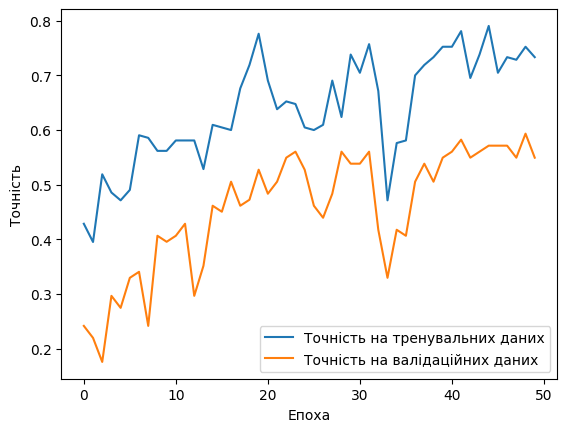

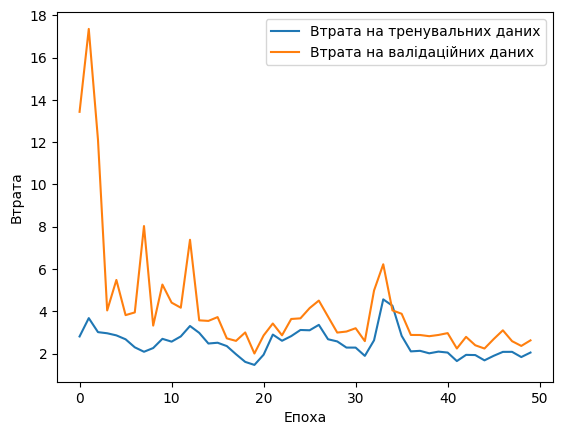

In [ ]:
import matplotlib.pyplot as plt

# Відображення графіка точності
plt.plot(history.history['accuracy'], label='Точність на тренувальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.show()

# Відображення графіка втрати
plt.plot(history.history['loss'], label='Втрата на тренувальних даних')
plt.plot(history.history['val_loss'], label='Втрата на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Зробити передбачення на тренувальних і тестових даних
rgb32_train_predictions = np.argmax(rgb32.predict(rgb32_train_frames, batch_size=8), axis=1)
rgb32_test_predictions = np.argmax(rgb32.predict(rgb32_test_frames, batch_size=8), axis=1)
rgb32_val_predictions = np.argmax(rgb32.predict(rgb32_val_frames, batch_size=8), axis=1)

# Отримати істинні мітки класів
rgb32_train_true_labels = np.argmax(rgb32_train_classes, axis=1)
rgb32_test_true_labels = np.argmax(rgb32_test_classes, axis=1)
rgb32_val_true_labels = np.argmax(rgb32_val_classes, axis=1)

# Побудувати матрицю плутанини для тренувальних і тестових даних
rgb32_train_confusion_matrix = confusion_matrix(rgb32_train_true_labels, rgb32_train_predictions)
rgb32_test_confusion_matrix = confusion_matrix(rgb32_test_true_labels, rgb32_test_predictions)
rgb32_val_confusion_matrix = confusion_matrix(rgb32_val_true_labels, rgb32_val_predictions)

12/12 [==============================] - 2s 183ms/step


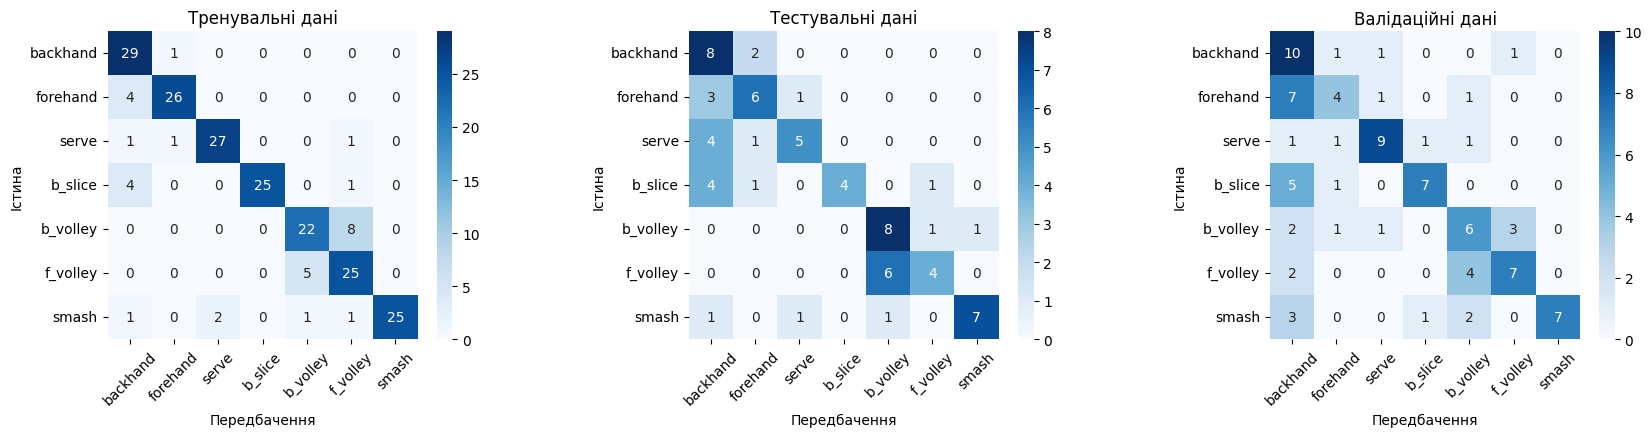

In [ ]:
class_labels = ['backhand', 'forehand', 'serve', 'b_slice', 'b_volley', 'f_volley', 'smash']

plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
sns.heatmap(rgb32_train_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Тренувальні дані')
plt.xlabel('Передбачення')
plt.ylabel('Істина')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=45)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)

plt.subplot(1, 3, 2)
sns.heatmap(rgb32_test_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Тестувальні дані')
plt.xlabel('Передбачення')
plt.ylabel('Істина')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=45)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)

plt.subplot(1, 3, 3)
sns.heatmap(rgb32_val_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Валідаційні дані')
plt.xlabel('Передбачення')
plt.ylabel('Істина')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=45)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)
plt.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Обчислення точності для тренувальних та тестових даних
rgb32_train_accuracy = accuracy_score(rgb32_train_true_labels, rgb32_train_predictions)
rgb32_test_accuracy = accuracy_score(rgb32_test_true_labels, rgb32_test_predictions)
rgb32_val_accuracy = accuracy_score(rgb32_val_true_labels, rgb32_val_predictions)

print("Train Accuracy:", rgb32_train_accuracy)
print("Test Accuracy:", rgb32_test_accuracy)
print("Val Accuracy:", rgb32_val_accuracy)

Train Accuracy: 0.8523809523809524
Test Accuracy: 0.6
Val Accuracy: 0.5494505494505495


In [ ]:
from sklearn.metrics import precision_score

class_names = {'backhand': 0, 'forehand': 1, 'serve': 2, 'b_slice': 3, 'b_volley': 4, 'f_volley': 5, 'smash': 6}

# Обчислити точність для тренувальних, валідаційних і тестових даних для кожного класу
rgb32_train_precision = precision_score(rgb32_train_true_labels, rgb32_train_predictions, average=None)
rgb32_val_precision = precision_score(rgb32_val_true_labels, rgb32_val_predictions, average=None)
rgb32_test_precision = precision_score(rgb32_test_true_labels, rgb32_test_predictions, average=None)

print("Точність рухів тренувальних даних:")
for class_name, precision in zip(class_names.keys(), rgb32_train_precision):
    print("{:8}: {:.4f}".format(class_name, precision))

print("\nТочність рухів валідаційних даних:")
for class_name, precision in zip(class_names.keys(), rgb32_val_precision):
    print("{:8}: {:.4f}".format(class_name, precision))

print("\nТочність рухів тестових даних:")
for class_name, precision in zip(class_names.keys(), rgb32_test_precision):
    print("{:8}: {:.4f}".format(class_name, precision))

Точність рухів тренувальних даних:
backhand: 0.7436
forehand: 0.9286
serve   : 0.9310
b_slice : 1.0000
b_volley: 0.7857
f_volley: 0.6944
smash   : 1.0000

Точність рухів валідаційних даних:
backhand: 0.3333
forehand: 0.5000
serve   : 0.7500
b_slice : 0.7778
b_volley: 0.4286
f_volley: 0.6364
smash   : 1.0000

Точність рухів тестових даних:
backhand: 0.4000
forehand: 0.6000
serve   : 0.7143
b_slice : 1.0000
b_volley: 0.5333
f_volley: 0.6667
smash   : 0.8750


In [ ]:
rgb32.save('rgb32_cnn3d.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
